# Homework 5

Jace Yang (UNI: jy3174)

In [1]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from time import time
import pickle

%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (8, 5)})
sns.set_context('paper', font_scale=1.5)

## Problem 1 - SSD, ONNX model, Visualization, Inferencing 35 points
In this problem we will be inferencing SSD ONNX model using ONNX Runtime Server. You will follow the github repo and ONNX tutorials (links provided below). You will start with a pretrained Pytorch SSD model and retrain it for your target categories. Then you will convert this Pytorch model to ONNX and deploy it on ONNX runtime server for inferencing.

For part 1, 2, and 3, refer to the steps in the github repo. For part 4 refer to ONNX tutorial on visualizing and for 5 and 6 refer to ONNX tutorial on inferencing.
References
- Github repo. Shot MultiBox Detector Implementation in Pytorch.
Available at https://github.com/qfgaohao/pytorch-ssd
- ONNX tutorial. Visualizing an ONNX Model.
Available at https://github.com/onnx/tutorials/blob/master/tutorials/VisualizingAModel.md
- ONNX tutorial. Inferencing SSD ONNX model using ONNX Runtime Server.
Available at https://github.com/onnx/tutorials/blob/master/tutorials/OnnxRuntimeServerSSDModel.ipynb
- Google. Open Images Dataset V5 + Extensions.
Available at https://storage.googleapis.com/openimages/web/index.html
- The PASCAL Visual Object Classes Challenge 2007 .
Available at http://host.robots.ox.ac.uk/pascal/VOC/voc2007/

### 1.
Download pretrained pytorch MobilenetV1 SSD and test it locally using Pascal VOC 2007 dataset. Show the test accuracy for the 20 classes. (4)

---

#### Download model

In [2]:
!wget -P models https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
!wget -P models https://storage.googleapis.com/models-hao/voc-model-labels.txt

--2022-04-16 20:37:31--  https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.42.240, 142.251.43.16, 172.217.163.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.42.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37995286 (36M) [application/octet-stream]
Saving to: ‘models/mobilenet-v1-ssd-mp-0_675.pth’

mobilenet-v1-ssd-mp 100%[===================>]  36.23M  11.4MB/s    in 3.2s    

2022-04-16 20:37:35 (11.4 MB/s) - ‘models/mobilenet-v1-ssd-mp-0_675.pth’ saved [37995286/37995286]

--2022-04-16 20:37:36--  https://storage.googleapis.com/models-hao/voc-model-labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.42.240, 142.251.43.16, 172.217.163.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.42.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145 [text/plain

#### Test it locally using Pascal VOC 2007 dataset

In [3]:
!wget -P data http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget -P data http://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar

--2022-04-16 20:37:47--  http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar [following]
--2022-04-16 20:37:47--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘data/VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  13.8MB/s    in 33s     

2022-04-16 20:38:22 (13.2 MB/s) - ‘data/VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

URL transformed to HTTPS due to an HSTS policy
--2022-04-16 20:38:23--  https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
Resolving pjreddie.com (pj

In [4]:
# Extract
! tar -xf data/VOCtest_06-Nov-2007.tar -C data/

#### Show the test accuracy for the 20 classes.

In [99]:
# Pull the repo
!git clone https://github.com/qfgaohao/pytorch-ssd.git

Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 812, done.
remote: Total 812 (delta 0), reused 0 (delta 0), pack-reused 812
Receiving objects: 100% (812/812), 1.05 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (544/544), done.


In [ ]:
!python pytorch-ssd/eval_ssd.py --net mb1-ssd \
    --dataset data/VOCdevkit/VOC2007/ \
    --trained_model models/mobilenet-v1-ssd-mp-0_675.pth \
    --label_file models/voc-model-labels.txt 

/Users/jace/Desktop/哥大22S/6998 DL/hw5/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.013670682907104492 seconds to load the model.
process image 0
Load Image: 0.012729 seconds.
Inference time:  0.055313825607299805
Prediction: 0.059958 seconds.
process image 1
Load Image: 0.002250 seconds.
Inference time:  0.05921196937561035
Prediction: 0.068164 seconds.
process image 2
Load Image: 0.002184 seconds.
Inference time:  0.055853843688964844
Prediction: 0.064791 seconds.
process image 3
Load Image: 0.002195 seconds.
Inference time:  0.05244898796081543
Prediction: 0.061518 seconds.
process image 4
Load Image: 0.002159 seconds.
Inference time:  0.057225942611694336
Prediction: 0.063530 seconds.
process image 5
Load Ima

**Average Test Precision Per-class:**
```
aeroplane: 0.6742489426027927
bicycle: 0.7913672875238116
bird: 0.612096015101108
boat: 0.5616407126931772
bottle: 0.3471259064860268
bus: 0.7742298893362103
car: 0.7284171192326804
cat: 0.8360675520354323
chair: 0.5142295855384792
cow: 0.6244090341627014
diningtable: 0.7060025454924147
dog: 0.7849252606216821
horse: 0.8202146617282785
motorbike: 0.793578272243471
person: 0.7042670984734087
pottedplant: 0.40257147509774405
sheep: 0.6071252282334352
sofa: 0.7549120254763918
train: 0.8270992920206008
tvmonitor: 0.6459903029666852
```

### 2. 


Select any two related categories from Google Open Images dataset and finetune the pretrained SSD model. Examples include, Aircraft and Aeroplane, Handgun and Shotgun. You can use open_images_downloader.py script provided at the github to download the data. For finetuning you can use the same parameters as in the tutorial below. Compute the accuracy of the test data for these categories before and after finetuning. $(5+5)$
___

#### Select any two related categories

I selected Handgun and Shotgu.

#### Download the data

In [115]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 69.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 14.6 MB/s eta 0:00:00


In [116]:
# Download the data for Handgun and Shotgu
!python pytorch-ssd/open_images_downloader.py \
    --root data/open_images \
    --class_names "Handgun,Shotgun" \
    --num_workers 10

2022-04-18 00:49:30,000 - root - Download https://storage.googleapis.com/openimages/2018_04/class-descriptions-boxable.csv.
2022-04-18 00:49:30,140 - root - Download https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv.
2022-04-18 00:49:40,140 - root - Read annotation file data/open_images/train-annotations-bbox.csv
2022-04-18 00:49:55,276 - root - train bounding boxes size: 1307
2022-04-18 00:49:55,276 - root - Approximate Image Stats: 
2022-04-18 00:49:55,279 - root - Handgun: 561/990 = 0.57.
2022-04-18 00:49:55,279 - root - Shotgun: 429/990 = 0.43.
2022-04-18 00:49:55,280 - root - Label distribution: 
2022-04-18 00:49:55,280 - root - Handgun: 727/1307 = 0.56.
2022-04-18 00:49:55,280 - root - Shotgun: 580/1307 = 0.44.
2022-04-18 00:49:55,280 - root - Shuffle dataset.
2022-04-18 00:49:55,281 - root - Save train data to data/open_images/sub-train-annotations-bbox.csv.
2022-04-18 00:49:55,292 - root - Download https://storage.googleapis.com/openimages/2018_

#### finetune the pretrained SSD model

In [14]:
# Finetuned use the same parameters as in the tutorial below
!python pytorch-ssd/train_ssd.py \
    --dataset_type open_images \
    --datasets data/open_images \
    --net mb1-ssd \
    --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth \
    --scheduler cosine \
    --lr 0.01 \
    --t_max 100 \
    --validation_epochs 5 \
    --num_epochs 100 \
    --base_net_lr 0.001  \
    --batch_size 5

2022-04-16 20:46:57,417 - root - INFO - Use Cuda.
2022-04-16 20:46:57,417 - root - INFO - Namespace(balance_data=False, base_net=None, base_net_lr=0.001, batch_size=5, checkpoint_folder='models/', dataset_type='open_images', datasets=['data/open_images'], debug_steps=100, extra_layers_lr=None, freeze_base_net=False, freeze_net=False, gamma=0.1, lr=0.01, mb2_width_mult=1.0, milestones='80,100', momentum=0.9, net='mb1-ssd', num_epochs=100, num_workers=4, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', t_max=100.0, use_cuda=True, validation_dataset=None, validation_epochs=5, weight_decay=0.0005)
2022-04-16 20:46:57,418 - root - INFO - Prepare training datasets.
2022-04-16 20:46:58,778 - root - INFO - Dataset Summary:Number of Images: 961
Minimum Number of Images for a Class: -1
Label Distribution:
	Handgun: 727
	Shotgun: 580
2022-04-16 20:46:58,780 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2022-04-16 20:46:58,780 -

#### Compute the accuracy of the test data for these categories before and after finetuning

In [15]:
# Download the labeled data
#!wget -P models https://storage.googleapis.com/models-hao/gun_model_2.21.pth
!wget -P models https://storage.googleapis.com/models-hao/open-images-model-labels.txt

--2022-04-16 21:39:41--  https://storage.googleapis.com/models-hao/open-images-model-labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.43.16, 142.251.42.240, 172.217.163.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.43.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26 [text/plain]
Saving to: ‘models/open-images-model-labels.txt.1’

open-images-model-l 100%[===================>]      26  --.-KB/s    in 0s      

2022-04-16 21:39:41 (1.37 MB/s) - ‘models/open-images-model-labels.txt.1’ saved [26/26]



##### Before finetuning

In [16]:
# Test the accuracy on guns images of epoch 0 (the original pretrained pytorch MobilenetV1 SSD)
!python pytorch-ssd/eval_ssd.py --net mb1-ssd \
      --trained_model models/mb1-ssd-Epoch-0-Loss-3.810793609619141.pth \
      --dataset_type open_images \
      --dataset data/open_images \
      --label_file models/open-images-model-labels.txt

It took 0.4770369529724121 seconds to load the model.
process image 0
Load Image: 0.024143 seconds.
Inference time:  0.018064498901367188
Prediction: 0.065412 seconds.
process image 1
Load Image: 0.010292 seconds.
Inference time:  0.005564451217651367
Prediction: 0.048378 seconds.
process image 2
Load Image: 0.009987 seconds.
Inference time:  0.00532078742980957
Prediction: 0.061342 seconds.
process image 3
Load Image: 0.012369 seconds.
Inference time:  0.005084514617919922
Prediction: 0.052183 seconds.
process image 4
Load Image: 0.016595 seconds.
Inference time:  0.0051801204681396484
Prediction: 0.053578 seconds.
process image 5
Load Image: 0.013005 seconds.
Inference time:  0.0051877498626708984
Prediction: 0.050452 seconds.
process image 6
Load Image: 0.011280 seconds.
Inference time:  0.005367755889892578
Prediction: 0.051041 seconds.
process image 7
Load Image: 0.013664 seconds.
Inference time:  0.0050771236419677734
Prediction: 0.047599 seconds.
process image 8
Load Image: 0.01

**The accuracy is worse than 50% before finetuning:**
```
Average Precision Per-class:
Handgun: 0.6634245254424282
Shotgun: 0.3071089197364704

Average Precision Across All Classes:0.48526672258944936
```

##### After finetuning

In [18]:
# Test the accuracy on guns images of epoch 0 (the original pretrained pytorch MobilenetV1 SSD)
!python pytorch-ssd/eval_ssd.py --net mb1-ssd \
      --trained_model models/mb1-ssd-Epoch-99-Loss-2.7977391386032107.pth \
      --dataset_type open_images \
      --dataset data/open_images \
      --label_file models/open-images-model-labels.txt

It took 0.07697081565856934 seconds to load the model.
process image 0
Load Image: 0.024666 seconds.
Inference time:  0.014791727066040039
Prediction: 0.036022 seconds.
process image 1
Load Image: 0.010873 seconds.
Inference time:  0.005686759948730469
Prediction: 0.043322 seconds.
process image 2
Load Image: 0.010181 seconds.
Inference time:  0.005356550216674805
Prediction: 0.035469 seconds.
process image 3
Load Image: 0.012861 seconds.
Inference time:  0.005488157272338867
Prediction: 0.031861 seconds.
process image 4
Load Image: 0.017556 seconds.
Inference time:  0.005354404449462891
Prediction: 0.036561 seconds.
process image 5
Load Image: 0.012980 seconds.
Inference time:  0.0055162906646728516
Prediction: 0.039133 seconds.
process image 6
Load Image: 0.011051 seconds.
Inference time:  0.005437612533569336
Prediction: 0.038641 seconds.
process image 7
Load Image: 0.013844 seconds.
Inference time:  0.005922555923461914
Prediction: 0.043112 seconds.
process image 8
Load Image: 0.01

**But after fine-tuning, the accuracy improved by about 20%:**
```
Average Precision Per-class:
Handgun: 0.7976381420849284
Shotgun: 0.5929687386097211

Average Precision Across All Classes:0.6953034403473248
```

### 3. 


Convert the Pytorch model to ONNX format and save it.
(4)

In [2]:
!pip install -r requirements.txt

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 829kB 233kB/s eta 0:00:01
     |████████████████████████████████| 163kB 243kB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 227kB/s eta 0:00:01
     |████████████████████████████████| 153kB 239kB/s eta 0:00:01
     |████████████████████████████████| 14.5MB 228kB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 241kB/s eta 0:00:01
     |████████████████████████████████| 81kB 212kB/s eta 0:00:01
     |████████████████████████████████| 163kB 202kB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 222kB/s eta 0:00:01
     |████████████████████████████████| 4.9MB 214kB/s eta 0:00:01
     |████████████████████████████████| 788kB 227kB/s eta 0:00:01
     |████████████████████████████████| 296kB 253kB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=ff6f74dcf22aa49ef5e803e224bce4227754c312bddeaf3a9e80a7de5b12f

In [3]:
# Usage: python convert_to_caffe2_models.py <net type: mobilenet-v1-ssd|others>  <model path>'
!python pytorch-ssd/convert_to_caffe2_models.py mb1-ssd models/mb1-ssd-Epoch-99-Loss-2.7977391386032107.pth models/open-images-model-labels.txt

Traceback (most recent call last):
  File "pytorch-ssd/convert_to_caffe2_models.py", line 9, in <module>
    from caffe2.python.onnx.backend import Caffe2Backend as c2
  File "/opt/conda/lib/python3.7/site-packages/caffe2/python/__init__.py", line 2, in <module>
    from caffe2.proto import caffe2_pb2
  File "/opt/conda/lib/python3.7/site-packages/caffe2/proto/__init__.py", line 11, in <module>
    from caffe2.proto import caffe2_pb2, metanet_pb2, torch_pb2
ImportError: cannot import name 'metanet_pb2' from 'caffe2.proto' (/opt/conda/lib/python3.7/site-packages/caffe2/proto/__init__.py)


### 4. 

Visualize the model using net drawer tool. Compile the model using embed_docstring flag and show the visualization output. Also show doc string (stack trace for PyTorch) for different types of nodes. (6)

In [189]:
# !git clone https://github.com/onnx/onnx.git

In [7]:
!python onnx/onnx/tools/net_drawer.py --input inference/mb1-ssd.onnx --output squeezenet.dot --embed_docstring

In [8]:
!dot -Tsvg squeezenet.dot -o squeezenet.svg

```python
from IPython.display import SVG, display
def show_svg():
    display(SVG("squeezenet.svg"))
show_svg()
```

<img src="squeezenet.svg">

### 5. 

Deploy the ONNX model on ONNX runtime (ORT) server. You need to set up the environment following steps listed in the tutorial. Then you need make HTTP request to the ORT server. Test the inferencing set-up using 1 image from each of the two selected categories. (6)

In [124]:
import onnx2

In [125]:
# First identify the input node and output node name for your onnx model.

model = onnx.load('/inference/mb1-ssd.onnx')
output =[node.name for node in model.graph.output]

input_all = [node.name for node in model.graph.input]

AttributeError: module 'onnx' has no attribute 'load'

In [87]:
input_initializer =  [node.name for node in model.graph.initializer]
net_feed_input = list(set(input_all)  - set(input_initializer))

print('Inputs: ', net_feed_input)
print('Outputs: ', output)

NameError: name 'model' is not defined

In [9]:
!wget https://onnxzoo.blob.core.windows.net/models/opset_10/ssd/ssd.onnx

--2022-04-17 23:00:12--  https://onnxzoo.blob.core.windows.net/models/opset_10/ssd/ssd.onnx
Resolving onnxzoo.blob.core.windows.net (onnxzoo.blob.core.windows.net)... failed: Name or service not known.
wget: unable to resolve host address ‘onnxzoo.blob.core.windows.net’


In [2]:
!sudo docker pull mcr.microsoft.com/onnxruntime/server

Using default tag: latest
latest: Pulling from onnxruntime/server
Digest: sha256:a23da0977bbc4aca4d3de56ad648ebde86031e61d7a3b7cbe1daaebbc7f6ad3d
Status: Image is up to date for mcr.microsoft.com/onnxruntime/server:latest
mcr.microsoft.com/onnxruntime/server:latest


In [53]:
!ls

COMS_E6998_012_Homework_5_Spring_2022_Jace.ipynb  assets
Untitled.ipynb					  inference


In [52]:
!cd inference

In [ ]:
!sudo docker run -it -v $(pwd):$(pwd) -p 9008:8001 mcr.microsoft.com/onnxruntime/server --model_path $(pwd)/mb1-ssd.onnx

Version: local_build
Commit ID: default

[2022-04-17 23:04:51.142] [ServerApp] [info] Model path: /home/jace/inference/ssd-10.onnx
[2022-04-17 23:04:51.221] [ServerApp] [warning] [ServerApp onnxruntime graph.cc:2367 CleanUnusedInitializers]: Removing initializer 'backbone.model.layer2.0.4.bn1.num_batches_tracked'. It is not used by any node and should be removed from the model.
[2022-04-17 23:04:51.221] [ServerApp] [warning] [ServerApp onnxruntime graph.cc:2367 CleanUnusedInitializers]: Removing initializer 'backbone.model.layer2.0.2.bn2.num_batches_tracked'. It is not used by any node and should be removed from the model.
[2022-04-17 23:04:51.221] [ServerApp] [warning] [ServerApp onnxruntime graph.cc:2367 CleanUnusedInitializers]: Removing initializer 'backbone.model.layer2.0.0.downsample.1.num_batches_tracked'. It is not used by any node and should be removed from the model.
[2022-04-17 23:04:51.222] [ServerApp] [warning] [ServerApp onnxruntime graph.cc:2367 CleanUnusedInitializers]:

In [10]:
# Import some dependency libraries that we are going to need to run the SSD model

import numpy as np
import assets.onnx_ml_pb2 as onnx_ml_pb2
import assets.predict_pb2 as predict_pb2
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

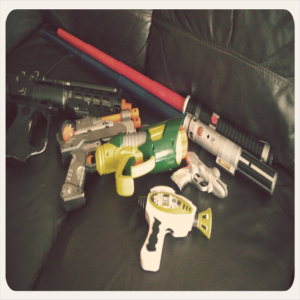

In [11]:
# Load the raw image

# input_shape = (1, 3, 1200, 1200)
# img = Image.open("assets/blueangels.jpg")
# img = img.resize((1200, 1200), Image.BILINEAR)


input_shape = (1, 3, 300, 300)
img = Image.open("data/open_images/test/0e6275396999530d.jpg")
img = img.resize((300, 300), Image.BILINEAR)

# Let us see what the input image looks like
img

### Pre-process the input image
Having loaded and resized the raw image to fit the model's requirements, we are further going to pre-process the image to take it to a state that the model has seen before as part of the "training" phase of the model.

In [12]:
# Preprocess and normalize the image

img_data = np.array(img)
img_data = np.transpose(img_data, [2, 0, 1])
img_data = np.expand_dims(img_data, 0)
mean_vec = np.array([0.485, 0.456, 0.406])
stddev_vec = np.array([0.229, 0.224, 0.225])
norm_img_data = np.zeros(img_data.shape).astype('float32')
for i in range(img_data.shape[1]):
    norm_img_data[:,i,:,:] = (img_data[:,i,:,:]/255 - mean_vec[i]) / stddev_vec[i]

### Construct an HTTP request for the ORT server
Now that we have an image that has undergone sufficient pre-processing for the model to process, we are going to "serialize" the image data to be sent over to the ORT Server that you just started as part of the pre-requisites. We are going to create an "HTTP request" that contains the image data that will be processed by the model hosted using the ORT server.

In [13]:
# Create request message to be sent to the ORT server

input_tensor = onnx_ml_pb2.TensorProto()
input_tensor.dims.extend(norm_img_data.shape)
input_tensor.data_type = 1
input_tensor.raw_data = norm_img_data.tobytes()

request_message = predict_pb2.PredictRequest()

# For your model, the inputs name should be something else customized by yourself. Use Netron to find out the input name.
request_message.inputs["image"].data_type = input_tensor.data_type
request_message.inputs["image"].dims.extend(input_tensor.dims)
request_message.inputs["image"].raw_data = input_tensor.raw_data

content_type_headers = ['application/x-protobuf', 'application/octet-stream', 'application/vnd.google.protobuf']

for h in content_type_headers:
    request_headers = {
        'Content-Type': h,
        'Accept': 'application/x-protobuf'
    }

### Make the HTTP request to the ORT server
Remember the HTTP request we just constructed ? We are going to actually make the constructed request so that the ORT server can receive the image data to be processed. The ORT server then sends the raw image data to the model hosted by it and waits for the inference results. Once the server gets back the inference results, it is going to relay it back to the caller (this notebook).

In [14]:
# Inference run using ORT server
# Change the number 9001 to the appropriate port number if you had changed it during ORT Server docker instantiation

PORT_NUMBER = 9001 # Change appropriately if needed based on any changes when invoking the server in the pre-requisites
PORT_NUMBER = 9008
inference_url = "http://127.0.0.1:" + str(PORT_NUMBER) + "/v1/models/default/versions/1:predict"

response = requests.post(inference_url, headers=request_headers, data=request_message.SerializeToString())

### Parse the response message from the ORT server
Having received the results from the server, we are going to parse the "serialized" message that we just received for us to make sense of the results. 

In [15]:
response.content

b'{"error_code": 400, "error_message": "ONNX Runtime Status Code: 2. Invalid Feed Input Name:image"}\n'

In [16]:
# Parse response message

response_message = predict_pb2.PredictResponse()
response_message.ParseFromString(response.content)

# For your model, the outputs names should be something else customized by yourself. Use Netron to find out the outputs names.
bboxes = np.frombuffer(response_message.outputs['bboxes'].raw_data, dtype=np.float32)
labels = np.frombuffer(response_message.outputs['labels'].raw_data, dtype=np.int64)
scores = np.frombuffer(response_message.outputs['scores'].raw_data, dtype=np.float32)

print('Boxes shape:', response_message.outputs['bboxes'].dims)
print('Labels shape:', response_message.outputs['labels'].dims)
print('Scores shape:', response_message.outputs['scores'].dims)

DecodeError: Error parsing message with type 'onnxruntime.server.PredictResponse'